In [1]:
import pandas as pd

# Homework 2

## Apartment Prices
1. Calculation of the price per square meter (ppsqm) for each apartment sold.

In [2]:
url = "https://github.com/su-mt4007/data/blob/9e75cba44692f1e240840a6bad6cc208bb9055b3/Booli_sold.csv"
local_file_path = "/Users/nicholas/su-mt4007/HW2/Booli_sold.csv"
df = pd.read_csv(local_file_path)
df.head(5)

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
0,3995000,4467.0,73.0,3.0,2018-10-15 13:33:18,1935.0,Lägenhet,3263989,2018-11-08,3820000,...,59.371033,18.054057,NaN,Stockholm,Stockholms län,260,MOHV,1901865,Broker,http://www.mohv.se/
1,1995000,1773.0,36.0,1.0,2018-10-05 14:29:28,1968.0,Lägenhet,3256231,2018-10-19,2355000,...,59.371242,18.057821,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
2,5100000,3839.0,81.0,3.0,2018-09-11 13:44:43,1936.0,Lägenhet,3236660,2018-09-27,6110000,...,59.371617,18.054716,NaN,Stockholm,Stockholms län,186,Historiska Hem AB,65645750,Broker,http://historiskahem.se/
3,5495000,4483.0,107.0,4.0,2018-08-25 02:56:56,1936.0,Lägenhet,3224374,2018-09-06,8050000,...,59.371480,18.053880,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
4,1995000,1696.0,29.0,1.0,2018-06-15 17:16:19,1936.0,Lägenhet,3185496,2018-06-18,2400000,...,59.372160,18.053542,True,Stockholm,Stockholms län,166,Mäklarhuset,204,Broker,http://www.maklarhuset.se/


In [3]:
# Cleaning.
cleaned_df = df[["listPrice", "livingArea", "location.distance.ocean"]]
cleaned_df

,listPrice,livingArea,location.distance.ocean
0,3995000,73.0,260
1,1995000,36.0,218
2,5100000,81.0,186
3,5495000,107.0,218
4,1995000,29.0,166
...,...,...,...
153,1495000,26.0,101
154,2245000,50.0,101
155,1450000,23.0,255
156,2495000,56.0,70


In [4]:
# Add new column (variable) "ppsqm".
cleaned_df["ppsqm"] = cleaned_df["listPrice"] / cleaned_df["livingArea"]
cleaned_df.head(5)

/var/folders/cb/g9sqtb0152z7p0gkpc7_07q00000gn/T/ipykernel_46874/1237057109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["ppsqm"] = cleaned_df["listPrice"] / cleaned_df["livingArea"]


,listPrice,livingArea,location.distance.ocean,ppsqm
0,3995000,73.0,260,54726.027397
1,1995000,36.0,218,55416.666667
2,5100000,81.0,186,62962.962963
3,5495000,107.0,218,51355.140187
4,1995000,29.0,166,68793.103448


2. Ranking of the top 5 most expensive appartments w.r.t ppsqm.

In [5]:
cleaned_df.sort_values("ppsqm", ascending = False).head()

,listPrice,livingArea,location.distance.ocean,ppsqm
10,2295000,29.0,136,79137.931034
50,1890000,24.0,161,78750.000000
54,1795000,23.0,135,78043.478261
49,3495000,47.0,171,74361.702128
24,2500000,35.0,218,71428.571429


3. The avereage ppsqm in Ekhagen.

In [6]:
print(df["ppsqm"].mean())

KeyError: 'ppsqm'

4. Highlighting of an interesting aspect of the data.

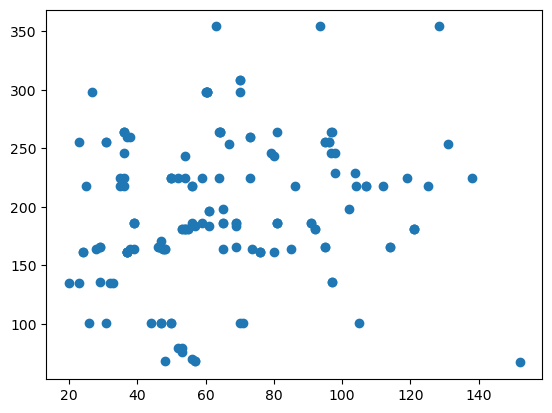

In [7]:
import matplotlib.pyplot as plt

x = df["livingArea"]
y = df["location.distance.ocean"]

plt.plot(x,y, 'o')

An interesting aspect of the data is that the price of an apartment seems uncorrelated to the distance to water.

## The Swedish Election of 2018
1. Calculation of the total number of legitimate votes (Giltiga Röster) in Stockholm during the election.  

In [8]:
local_file_path = "/Users/nicholas/su-mt4007/HW2/2018_R_per_kommun.csv"
df = pd.read_csv(local_file_path, sep = ';', decimal = ",")
df.head(6)

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
0,1,14,Stockholms län,Upplands Väsby,23.11,6.26,5.66,6.71,26.97,8.01,...,NaN,NaN,NaN,0.04,0.69,0.06,25830,26036,30740,84.70
1,1,15,Stockholms län,Vallentuna,28.29,10.11,7.73,7.58,18.91,4.47,...,0.0,NaN,0.00,0.02,0.59,0.08,20952,21099,23438,90.02
2,1,17,Stockholms län,Österåker,29.68,9.35,7.48,7.13,19.71,4.97,...,NaN,NaN,0.01,0.03,0.69,0.13,27711,27947,31309,89.26
3,1,20,Stockholms län,Värmdö,27.49,9.76,6.40,5.89,20.48,6.02,...,NaN,NaN,0.01,0.04,0.67,0.07,28115,28335,31371,90.32
4,1,23,Stockholms län,Järfälla,23.96,6.31,6.04,6.29,27.68,8.75,...,0.0,NaN,0.02,0.04,0.53,0.07,45654,45948,53230,86.32
5,1,25,Stockholms län,Ekerö,28.12,11.24,7.64,7.85,17.17,4.76,...,NaN,NaN,0.01,0.01,0.64,0.08,17814,17946,19472,92.16


In [9]:
# Select.
cleaned_df = df[["LÄNSNAMN", "KOMMUNNAMN", "S", "RÖSTER GILTIGA", "VALDELTAGANDE"]]
cleaned_df.head(5)

,LÄNSNAMN,KOMMUNNAMN,S,RÖSTER GILTIGA,VALDELTAGANDE
0,Stockholms län,Upplands Väsby,26.97,25830,84.70
1,Stockholms län,Vallentuna,18.91,20952,90.02
2,Stockholms län,Österåker,19.71,27711,89.26
3,Stockholms län,Värmdö,20.48,28115,90.32
4,Stockholms län,Järfälla,27.68,45654,86.32


In [10]:
filtered_df = cleaned_df[cleaned_df["LÄNSNAMN"] == "Stockholms län"]
filtered_df.head(5)

,LÄNSNAMN,KOMMUNNAMN,S,RÖSTER GILTIGA,VALDELTAGANDE
0,Stockholms län,Upplands Väsby,26.97,25830,84.70
1,Stockholms län,Vallentuna,18.91,20952,90.02
2,Stockholms län,Österåker,19.71,27711,89.26
3,Stockholms län,Värmdö,20.48,28115,90.32
4,Stockholms län,Järfälla,27.68,45654,86.32


In [11]:
legitimate_votes = filtered_df["RÖSTER GILTIGA"].sum()
print(legitimate_votes)

1426237


There were a total of 1.426.237 legitimate votes in Stockholm during the election.

2. The municipality the social democratic party (Social demokraterna, S) garnered the hightest voting percentage.

In [12]:
# Sort in descending order the percentage of votes for the social democratic party (Social demokraterna, S).
cleaned_df.sort_values(by = ["S"],
                       ascending = False).head(10)

,LÄNSNAMN,KOMMUNNAMN,S,RÖSTER GILTIGA,VALDELTAGANDE
188,Värmlands län,Munkfors,52.18,2340,85.13
286,Norrbottens län,Piteå,47.48,29523,89.80
196,Värmlands län,Hagfors,47.46,7607,84.09
279,Norrbottens län,Överkalix,46.68,2241,85.11
280,Norrbottens län,Kalix,45.37,10971,87.04
275,Västerbottens län,Skellefteå,45.31,48964,87.87
284,Norrbottens län,Älvsbyn,44.82,5306,85.44
276,Norrbottens län,Arvidsjaur,44.65,4175,85.43
252,Västernorrlands län,Örnsköldsvik,44.59,37786,88.57
202,Örebro län,Degerfors,44.07,6415,87.10


The municipality the social democratic party (Social demokraterna, S) garnered the hightest voting percentage was Munkfors municipality.

3. Ranking the (3) municipalities with highest participation (valdeltagande) in the form of a table. The (3) municipalities with highest participation (valdeltagande) is presented in the below table.

In [16]:
# Sort in descending order the column/variable "VALDELTAGANDE".
cleaned_df = cleaned_df[["KOMMUNNAMN", "VALDELTAGANDE"]]
cleaned_df.sort_values(by = ["VALDELTAGANDE"],
                       ascending = False).head(3)

,KOMMUNNAMN,VALDELTAGANDE
103,Lomma,93.86
59,Habo,93.35
98,Vellinge,93.13


## Predicting Strokes

### A conclusion about the dataset "stroke-data.csv".